# Proyek Analisis Data:   
- **Nama:** Bertnardo Mario Uskono
- **Email:** bertnardouskono@gmail.com
- **ID Dicoding:** MC190D5Y1643

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada hari apa dalam seminggu jumlah peminjam sepeda paling tinggi?
- Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjam sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

*mengambil data dari drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/Bike Sharing Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data berhasil di-load dari file day.csv ke dalam DataFrame day_df.
- 5 baris pertama data ditampilkan untuk memberikan gambaran awal isi dataset.

### Assessing Data

In [ ]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset terdiri dari 731 entri dan 16 kolom.
- dteday bertipe object, harus diubah menjadi tipe datetime
- Tidak ada duplikasi data.
- beberapa kolom memiliki nilai yang terdistribusi secara berbeda.

### Cleaning Data

In [ ]:
# Cleaning data
day_df["tanggal"] = pd.to_datetime(day_df["tanggal"]) #udh keubah dri dteday ke tanggal
day_df.rename(columns={
    'tanggal': 'tanggal',
    'yr': 'tahun',
    'mnth': 'bulan',
    'weekday': 'hari_kerja',
    'weathersit': 'kondisi_cuaca',
    'temp': 'suhu',
    'atemp': 'suhu_terasa',
    'hum': 'kelembaban',
    'windspeed': 'kecepatan_angin',
    'cnt': 'total_peminjam'
}, inplace=True)

day_df["hari_kerja"] = day_df["hari_kerja"].replace({
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
})

day_df["kondisi_cuaca"] = day_df["kondisi_cuaca"].replace({
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
})

day_df.head()

,instant,tanggal,season,tahun,bulan,holiday,hari_kerja,workingday,kondisi_cuaca,suhu,suhu_terasa,kelembaban,kecepatan_angin,casual,registered,total_peminjam
0,1,2011-01-01,1,0,1,0,Sabtu,0,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Minggu,0,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom dteday diubah menjadi tipe datetime. dari dteday menjadi tanggal
- Nama kolom diubah agar lebih mudah dipahami.
- nilai pada kolom hari_kerja dan kondisi_cuaca diubah agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore total peminjam berdasarkan hari kerja

In [ ]:
day_df.groupby(by="hari_kerja").agg({
    "total_peminjam": ["max", "min", "mean", "sum"]
})

total_peminjam                           
                      max   min         mean     sum
hari_kerja                                          
Jumat                8362  1167  4690.288462  487790
Kamis                7804   431  4667.259615  485395
Minggu               8227   605  4228.828571  444027
Rabu                 8173   441  4548.538462  473048
Sabtu                8714   627  4550.542857  477807
Selasa               7767   683  4510.663462  469109
Senin                7525    22  4338.123810  455503

**Insight:**
- Terlihat bahwa rata-rata dan total peminjam tertinggi terjadi pada hari Jumat.

### Explore total peminjam berdasarkan kondisi cuaca

In [ ]:
day_df.groupby(by="kondisi_cuaca").agg({
    "total_peminjam": ["max", "min", "mean", "sum"]
})

total_peminjam                           
                         max  min         mean      sum
kondisi_cuaca                                          
Berkabut                8362  605  4035.862348   996858
Cerah                   8714  431  4876.786177  2257952
Hujan Ringan            4639   22  1803.285714    37869

**Insight:**
- Kondisi cuaca cerah memiliki jumlah rata-rata dan total peminjam tertinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apa dalam seminggu jumlah peminjam sepeda paling tinggi?

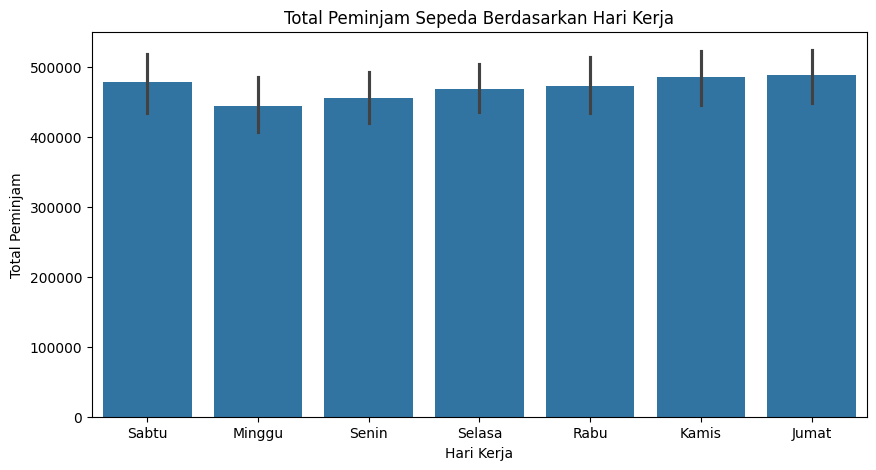

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="hari_kerja", y="total_peminjam", data=day_df, estimator=sum)
plt.title("Total Peminjam Sepeda Berdasarkan Hari Kerja")
plt.xlabel("Hari Kerja")
plt.ylabel("Total Peminjam")
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjam sepeda harian?



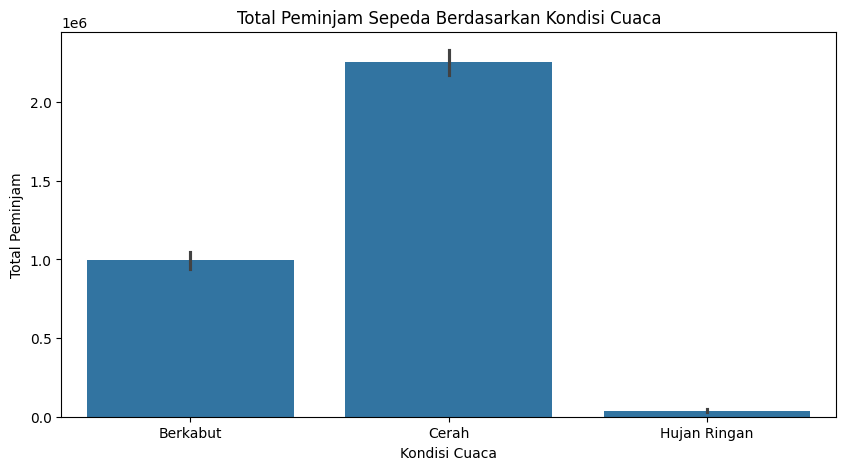

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="kondisi_cuaca", y="total_peminjam", data=day_df, estimator=sum)
plt.title("Total Peminjam Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Peminjam")
plt.show()

**Insight:**
- Visualisasi memperkuat hasil EDA, menunjukkan bahwa hari Jumat dan kondisi cuaca cerah memiliki jumlah peminjam sepeda tertinggi.

## Analisis Lanjutan (Opsional) - Analisis korelasi antar variabel numerik

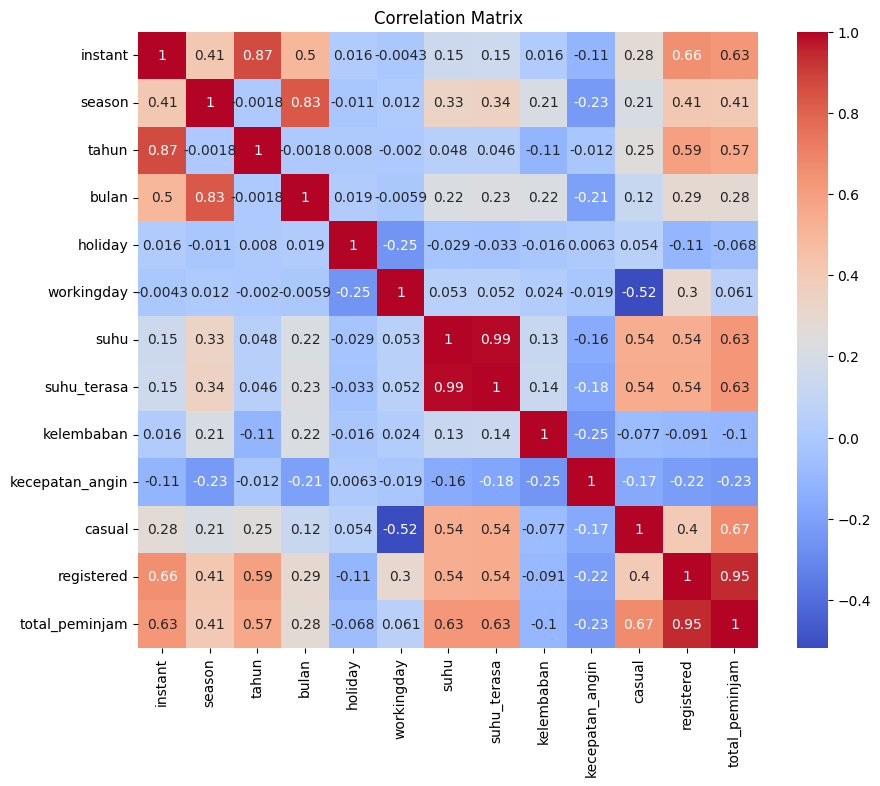

In [ ]:
correlation_matrix = day_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Conclusion


1. **Hari dengan Peminjaman Tertinggi:**  
   - Hari **Jumat** memiliki jumlah peminjam sepeda tertinggi dalam seminggu.
   - Bisa dilihat pola pattern pada bar chart total peminjam menunjukan kenaikan jumlah konsumen saat menjelang akhir pekan.
   - Peningkatan ini kemungkinan disebabkan oleh meningkatnya aktivitas masyarakat menjelang akhir pekan, seperti persiapan liburan atau pulang kerja lebih awal.

2. **Pengaruh Kondisi Cuaca terhadap Peminjaman:**  
   - Kondisi cuaca **cerah** memiliki jumlah peminjam sepeda tertinggi.
   - Sebaliknya, kondisi **hujan ringan** menunjukkan jumlah peminjam terendah, yang menunjukkan bahwa cuaca buruk mengurangi minat masyarakat untuk bersepeda.  
   - Rata-rata peminjaman pada cuaca cerah lebih tinggi dibandingkan kondisi berkabut dan hujan ringan, yang tetap menunjukkan angka peminjaman lebih rendah.  

**Rekomendasi:**  
- Menyesuaikan jumlah sepeda yang tersedia pada hari dengan permintaan tertinggi, terutama pada hari Jumat.  
- Menyediakan promo atau diskon khusus pada hari-hari dengan peminjaman rendah untuk meningkatkan penggunaan sepeda.  
- Pada musim hujan, penyedia layanan dapat menyediakan fasilitas tambahan seperti tempat berteduh atau perlengkapan hujan untuk meningkatkan kenyamanan pengguna.